In [1]:
# Modules used for basic analysis
from configure import configuration
from analysis import analysis
from generate import generate
from compare import compare

# Modules used for more advanced analysis
from subprocesses import ghsci
from subprocesses._utils import plot_choropleth_map

# Global Healthy and Sustainable City Indicators (GHSCI) analysis for Las Palmas de Gran Canaria, Spain

This notebook contains an example of how the GHSCI tool can be used to run an analysis for a study region of interest, for example, a city or set of neighbourhoods.

In [2]:
codename = 'example_ES_Las_Palmas_2023'

## Configuration

A configured sample study region file has been provided with the software in the folder `process/configuration/regions`:

`example_ES_Las_Palmas_2023.yml`
  - This **example** defines the Spanish city of Las Palmas de Gran Canaria with a target time point of 2023
  - The codename `example_ES_Las_Palmas_2023` describes the above using a recommended shorthand structure, starting with a two-letter country code
    - For cities with shared names in different countries like Valencia this can differentiate between the two (i.e. ES_Valencia_2023 refers to the city in Spain, and VE_Valencia_2023 to the city Venezuela, and both using the same time point of 2023)
  - You can use suffixes or prefixes as required to ensure your codenames clearly describe the study region configurations they represent

New study regions can be created either by copying, renaming and editing this file in a text editor, or by running the configuration utility (e.g. `configure codename_for_your_city` at the command line, or `configuration("codename_for_your_city")` as demonstrated in the next codeblock below.

Later on in this script directions for conducting a **sensitivity analysis** by copying and modifying the example configuration file:

`ES_Las_Palmas_2023_test_not_urbanx.yml`
  - This study region configuration provides a sensitivity analysis for the use of a city administrative boundary without restricting to the intersection with an urban region using the Global Human Settlements Layer Urban Centres Database (ie. `ghsl_intersection = false` instead of `true`)
  - We can use this later on in the workflow to compare the indicator results as a sensitivity analysis and evaluate the impact of this methodological decision

In [3]:
# initialise a configuration file
configuration(codename)


Configuration file for the specified study region codename
'example_ES_Las_Palmas_2023' already exists:
configuration/regions/example_ES_Las_Palmas_2023.yml.

Please open and edit this file in a text editor following the provided example
directions in order to complete configuration for your study region.  A
completed example study region configuration can be viewed in the file
'configuration/regions/example_ES_Las_Palmas_2023.yml'.

To view additional guidance on configuration, run this script again without a
codename.

Once configuration has been completed, to proceed to analysis for this city,
enter:
analysis example_ES_Las_Palmas_2023


## Analysis

The below function runs the following series of scripts located in the `subprocesses` folder for the specified study region codename:

|**Subprocess step** | **Description** | 
|--------------------|-----------------|
|_00_create_database.py | Create database | 
|_01_create_study_region.py | Create study region | 
|_02_create_osm_resources.py | Create OpenStreetMap resources | 
|_03_create_network_resources.py | Create pedestrian network | 
|_04_create_population_grid.py | Align population distribution | 
|_05_compile_destinations.py | Compile destinations | 
|_06_open_space_areas_setup.py | Identify public open space | 
|_07_locate_origins_destinations.py | Analyse local neighbourhoods | 
|_08_destination_summary.py | Summarise spatial distribution | 
|_09_urban_covariates.py | Collate urban covariates | 
|_10_gtfs_analysis.py | Analyse GTFS Feeds | 
|_11_neighbourhood_analysis.py | Analyse neighbourhoods | 
|_12_aggregation.py | Aggregate region summary analyses | y analyses',

In [4]:
analysis(codename)


Las Palmas de Gran Canaria (example_ES_Las_Palmas_2023)

Output directory:
  process/data/_study_region_outputs/example_ES_Las_Palmas_2023

A dated copy of project and region parameters has been saved as
process/data/_study_region_outputs/example_ES_Las_Palmas_2023/_parameters.yml.

Analysis time zone: Australia/Melbourne (to set time zone for where you are,
edit config.yml)

Analysis start:	2023-06-12_0901


                                      0%|                              | (0/13)

Analysis end:	2023-06-12_0904 (approximately 3.2 minutes)

To generate resources (data files, documentation, maps, figures, reports) using
the processed results for this study region, enter:

generate example_ES_Las_Palmas_2023

The Postgis SQL database for this city example_es_las_palmas_2023 can also be
accessed from QGIS or other applications by specifying the server as 'localhost'
and port as '5433', with username 'postgres' and password 'ghscic'.The SQL
database can also be explored on the command line by using the above password
after entering,'psql -U postgres -h gateway.docker.internal -p 5433 -d
"example_es_las_palmas_2023"'. When using psql, you can type '\dt' to list
database tables, '\d <table_name>' to list table columns, and 'SELECT * FROM
<table_name> LIMIT 10;' to view the first 10 rows of a table.  To exit psql,
enter '\q'.



## Generate resources

The `generate()` function is used to generate data, metadata, maps, figure and reports, optionally in multiple languages, for processed cities.  It lists the resources as they are generated.

If you remove or comment out the line `%matplotlib agg`, then images will be displayed below.  This has been disabled for the example notebook to keep the file size down.

In [5]:
# generate resources, but suppress display of images in this Jupyter Notebook to reduce filesize
%matplotlib agg 
generate(codename)


Las Palmas de Gran Canaria (example_ES_Las_Palmas_2023)

Output directory:
  process/data/_study_region_outputs/example_ES_Las_Palmas_2023

Analysis parameter summary text file
  _parameters.yml

Analysis log text file
  __Las Palmas de Gran Canaria__example_ES_Las_Palmas_2023_processing_log.txt

Data files
  example_ES_Las_Palmas_2023_1600m_buffer.gpkg
    - indicators_school_districts_grid_pop
    - indicators_buildings_osm_30m
    - indicators_region
    - indicators_100m_2020
    - indicators_sample_points
    - aos_public_osm
    - dest_type
    - destinations
    - clean_intersections_12m
    - edges
    - nodes
    - pt_stops_headway
  example_ES_Las_Palmas_2023_indicators_region.csv
  example_ES_Las_Palmas_2023_indicators_100m_2020.csv

Data dictionaries
  output_data_dictionary.csv
  output_data_dictionary.xlsx

Metadata
  example_ES_Las_Palmas_2023_metadata.yml
  example_ES_Las_Palmas_2023_metadata.xml

Figures and maps (English)
  figures/access_profile_English.jpg
  figure

## Sensitivity analyses

To evaluate the impact of your methodological decisions taken when configuring your study region, including selection of data sources, you may conduct sensitivity analyses.  An example could be run to explore the impact of the decision to restrict to the urban area (`example_ES_Las_Palmas`) or not (`ES_Las_Palmas_2023_test_not_urbanx`).  *A priori*, we would assume that by restricting to an urban area would result in higher estimates for population density and street connectivity, and more proximal access to amenities.

Other comparisons are possible.  For example, 

- one could vary the study region boundary supplied, the parameter used for consolidating intersections, supply additional destination data or modify the definitions used to extract features of interest from the OpenStreetMap data.
  - When doing these modifications, the resulting generated datasets can be inspected by local experts to evaluate how they conform with their knowledge of the area under study.  
- An official reference set of data could be used for example for population, to evaluate the use of a modelled population data layer compared with the official population data.  
- Population data for demographic sub-groups could be used (eg. using strata of age and/or sex, or other characteristics as available); the resulting aggregated study region indicators would provide population-specific estimates.
- Analyses could be conducted for different time points using historical data
- Finally, data could be modified to represent hypothetical interventions and evaluate their impact on the calculated indicators

To run the following analysis, copy the file `process/configuration/example_ES_Las_Palmas.yml` to a new file named `example_ES_Las_Palmas_test_not_urbanx.yml`.  Open this in a text editor and replace the `ghsl_urban_intersection: true` in the study region boundary to read `ghsl_urban_intersection: false`.

In [6]:
comparison_codename = 'ES_Las_Palmas_2023_test_not_urbanx'

In [7]:
analysis(comparison_codename)


Las Palmas de Gran Canaria (ES_Las_Palmas_2023_test_not_urbanx)

Output directory:
  process/data/_study_region_outputs/ES_Las_Palmas_2023_test_not_urbanx

A dated copy of project and region parameters has been saved as process/data/_st
udy_region_outputs/ES_Las_Palmas_2023_test_not_urbanx/_parameters.yml.

Analysis time zone: Australia/Melbourne (to set time zone for where you are,
edit config.yml)

Analysis start:	2023-06-12_0910


                                      0%|                              | (0/13)

Analysis end:	2023-06-12_0913 (approximately 3.5 minutes)

To generate resources (data files, documentation, maps, figures, reports) using
the processed results for this study region, enter:

generate ES_Las_Palmas_2023_test_not_urbanx

The Postgis SQL database for this city es_las_palmas_2023_test_not_urbanx can
also be accessed from QGIS or other applications by specifying the server as
'localhost' and port as '5433', with username 'postgres' and password
'ghscic'.The SQL database can also be explored on the command line by using the
above password after entering,'psql -U postgres -h gateway.docker.internal -p
5433 -d "es_las_palmas_2023_test_not_urbanx"'. When using psql, you can type
'\dt' to list database tables, '\d <table_name>' to list table columns, and
'SELECT * FROM <table_name> LIMIT 10;' to view the first 10 rows of a table.  To
exit psql, enter '\q'.



In [8]:
# generate resources, but suppress display of images in this Jupyter Notebook to reduce filesize
%matplotlib agg
generate(comparison_codename)


Las Palmas de Gran Canaria (ES_Las_Palmas_2023_test_not_urbanx)

Output directory:
  process/data/_study_region_outputs/ES_Las_Palmas_2023_test_not_urbanx

Analysis parameter summary text file
  _parameters.yml

Analysis log text file
  __Las Palmas de Gran Canaria__ES_Las_Palmas_2023_test_not_urbanx_processing_log.txt

Data files
  ES_Las_Palmas_2023_test_not_urbanx_1600m_buffer.gpkg
    - indicators_school_districts_grid_pop
    - indicators_buildings_osm_30m
    - indicators_region
    - indicators_100m_2020
    - indicators_sample_points
    - aos_public_osm
    - dest_type
    - destinations
    - clean_intersections_12m
    - edges
    - nodes
    - pt_stops_headway
  ES_Las_Palmas_2023_test_not_urbanx_indicators_region.csv
  ES_Las_Palmas_2023_test_not_urbanx_indicators_100m_2020.csv

Data dictionaries
  output_data_dictionary.csv
  output_data_dictionary.xlsx

Metadata
  ES_Las_Palmas_2023_test_not_urbanx_metadata.yml
  ES_Las_Palmas_2023_test_not_urbanx_metadata.xml

Figures 

## Comparisons

As suggested above, a variety of interesting comparisons can be made using generated indicator data

- Sensitivity analyses exploring the impact of methodological choices
- Comparisons between different study regions for the same point in time
- Comparisons within a city for different points in time
- Evaluating the impact of hypothetical scenarios and/or interventions, using modified data

Below, we compare the impact of restricting the study region to the urban area

In [9]:
compare(codename,comparison_codename)


Las Palmas de Gran Canaria (example_ES_Las_Palmas_2023)

Output directory:
  process/data/_study_region_outputs/example_ES_Las_Palmas_2023


Comparison saved as compare_example_ES_Las_Palmas_2023_ES_Las_Palmas_2023_test_not_urbanx_2023-06-12_0901.csv



,example_ES_Las_Palmas_2023,ES_Las_Palmas_2023_test_not_urbanx
Area (sqkm),62.987900,103.315941
Population estimate,333051.000000,366501.000000
Population per sqkm,5288.000000,3547.000000
Intersections,5291.000000,6629.000000
Intersections per sqkm,84.000261,64.162412
urban_sample_point_count,31814.000000,37526.000000
pop_pct_access_500m_fresh_food_market_score,53.941766,48.811916
pop_pct_access_500m_convenience_score,56.873850,51.024605
pop_pct_access_500m_pt_osm_any_score,85.605719,82.910155
pop_pct_access_500m_public_open_space_any_score,76.050245,70.427300


We can see from the above comparison that, as expected, density estimates and the percentage of population with access to most kinds of amenities evaluated were higher with restriction to the empirically defined urban region (63 sqkm compared with 103.3 sqkm; the latter being 1.6 times the size but having only approximately 10% more population).  The differences in walkability results reflect the fact that most people live in the smaller, more urbanised portion of the study region.  The most likely explanation for the observed differences in indicators is that urban areas are associated with higher population, street connectivity and levels of amenity provision.  However, the possibility of data bias should also be considered and if possible evaluated: data may have more completeness, detail and be more up to date for urban areas.  

Hence, restriction to the empirical urban area is an important methodological choice: it could mitigate bias for areas in cases where data is found lacking, however, it could also exclude important sectors of the population living in urban fringe areas that may be of interest and whose inclusion may be important for a more complete understanding of the equitable distribution of healthy and sustainable urban environments.  

Decisions such as these need to be made by analysts with local area knowledge or in consulation with local experts to ensure the representation and analysis of the study region in question is fair, meaningful and useful for informing local decision making.  Sensitivity analyses can be used to justify the decisions made when configuring analyses, to understand their consequences for inference and help validate and thus ensure quality of the indicator data, estimates and reports produced prior to dissemination.

## More advanced usage and mapping
Regions can also be defined programmatically, and this is what is occuring under the hood in the subprocesses that were run above:

In [10]:
r = ghsci.Region('example_ES_Las_Palmas_2023')

The high level functions of `analysis()`, `generate()` and `compare()` can also be performed directly using this `Region` object:
```
r.analysis()
r.generate()
r.comparison(comparison_codename)
```

The `Region` object contains a number of additional methods for performing additional tasks.

For example, `r.get_df('indicators_region')` can be used to retrieve and display a dataframe of processed study region results:

In [11]:
r.get_df('indicators_region')

,Continent,Country,ISO 3166-1 alpha-2,study_region,Area (sqkm),Population estimate,Population per sqkm,Intersections,Intersections per sqkm,E_EC2E_T15,...,pop_pct_access_500m_pt_any_score,pop_nh_pop_density,pop_nh_intersection_density,pop_daily_living,pop_walkability,local_nh_population_density,local_nh_intersection_density,local_daily_living,local_walkability,geom
0,Europe,Spain,ES,Las Palmas de Gran Canaria,62.9879,333051,5288,5291,84.000261,206489.154347,...,92.685524,10311.232799,184.871877,2.035011,0.597249,8310.625028,165.812482,1.609482,-0.731276,0106000020031600000b00000001030000000100000004...


You could also list the tables that have been generated in the study region database:

In [12]:
r.get_tables()

['spatial_ref_sys',
 'osm_20230221_point',
 'nodes',
 'script_log',
 'study_region_boundary',
 'osm_20230221_roads',
 'edges_simplified',
 'clean_intersections_12m',
 'full_urban_region',
 'edges_vertices_pgr',
 'edges',
 'urban_region',
 'osm_20230221_polygon',
 'osm_20230221_line',
 'urban_study_region_1600m',
 'population_100m_2020',
 'dest_type',
 'urban_study_region',
 'not_open_space',
 'aos_nodes',
 'open_space',
 'aos_public_osm',
 'open_space_areas',
 'aos_line',
 'aos_public_any_nodes_30m_line',
 'aos_public_large_nodes_30m_line',
 'sampling_points_30',
 'destinations',
 'urban_sample_points',
 'population_dest_summary',
 'urban_dest_summary',
 'urban_covariates',
 'nodes_pop_intersect_density',
 'pt_stops_headway',
 'indicators_sample_points',
 'indicators_100m_2020',
 'indicators_region',
 'agg_school_districts_grid_pop',
 'indicators_school_districts_grid_pop',
 'indicators_buildings_osm_30m']

You can also use other functions that accept a `Region` as an argument.

For example, an interactive choropleth map for a particular indicator of interest can be generated and displayed (this code has been left unrun so data isn't embedded in the notebook, reducing the file size):

In [ ]:
map = plot_choropleth_map(
    r,
    field='local_walkability',
    layer=r.config['grid_summary'],
    layer_id='grid_id',
    title='Local walkability',
    attribution='Global Healthy and Sustainable City Indicators Collaboration'
)
map

Here is a screenshot of what the above cell looks like when run:
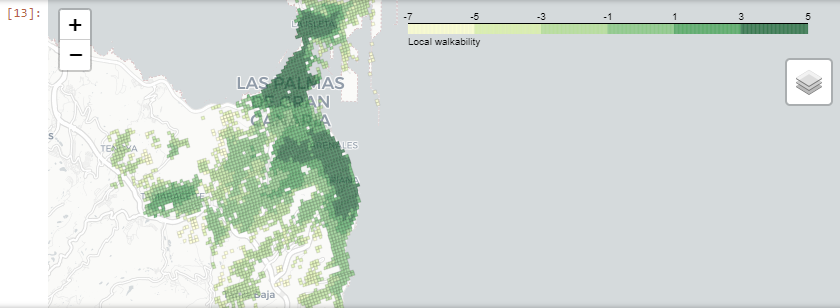
In the interactive version, you can hover over grid cells to view the value of the specified indicator for that location.

This map could be exported to a stand-alone html file `interactive_local_walkability_map_example.html` for viewing in your own web browser:

In [14]:
map.save(f'{r.config["region_dir"]}/interactive_local_walkability_map_example.html')

As a result of running the above process, this interactive map HTML file and the other generated resources can be found in the study region data output folder:
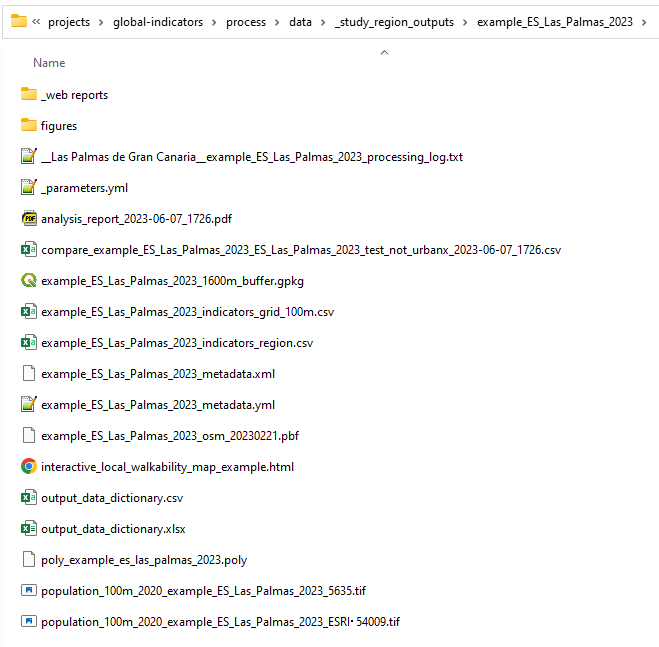